In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#implement a series of machine learning regressors to predict the grade of a student based on EDA information
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [6]:
#read the data
df_final = pd.read_csv('./dataframes/All_Subjects/ML/Processed_EDA_Final_Win_120_Stats.csv', index_col=0)

In [7]:
df_final.head()

,Subject,Grade,Exam,EDA_Tonic_mean,EDA_Phasic_mean,SCR_Amplitude_mean,SCR_RiseTime_mean,SCR_Amplitude_RiseTime_Ratio_mean,EDA_Phasic_std,EDA_Phasic_AUC,SCR_Peaks_sum
0,1,182.0,3.0,0.190630,-0.000012,0.010315,0.143056,0.016911,0.005539,-0.001487,25.0
1,2,180.0,3.0,0.131822,-0.000035,0.013558,0.162500,0.025895,0.007952,-0.003527,27.0
2,3,188.0,3.0,0.349780,0.000545,0.053696,0.592232,0.054560,0.045907,0.065095,124.0
3,4,149.0,3.0,0.688208,-0.000434,0.069637,0.466925,0.080002,0.048556,-0.052206,111.0
4,5,157.0,3.0,0.689593,-0.000072,0.197000,0.740278,0.196564,0.086787,-0.009041,71.0


In [8]:
print(f"The min grade is {df_final.Grade.min()}, \n the max is {df_final.Grade.max()}, \n the mean is {df_final.Grade.mean()}, \n and the std is {df_final.Grade.std()}")

The min grade is 110.0, 
 the max is 188.0, 
 the mean is 160.77, 
 and the std is 28.18619728114662


In [9]:
#drop the student ID
df_final = df_final.drop(columns=['Subject'])

#split the data into features and target
X = df_final.drop(columns=['Grade'])
y = df_final['Grade']
#normalize the target
y = y/y.max()

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#use PCA to reduce the number of features
#from sklearn.decomposition import PCA
#pca = PCA(n_components=0.95)
#X_train_scaled = pca.fit_transform(X_train_scaled)
#X_test_scaled = pca.transform(X_test_scaled)

In [10]:
#implement a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = lin_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.004460225276518365
RMSE: 0.06678491803183084
R^2: 0.6745535296157208
AIC: -90.25112007591294


In [11]:
#implement a random forest regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = rf_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.004946505488909034
RMSE: 0.07033139760383718
R^2: 0.63907142525354
AIC: -88.18147827092992


In [12]:
#implement a gradient boosting regressor
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = gb_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.005879783231055051
RMSE: 0.07667974459435198
R^2: 0.570973531483761
AIC: -84.72470766435956


In [13]:
#implement a support vector regressor
svr = SVR()
svr.fit(X_train_scaled, y_train)

#predict the target
y_pred = svr.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.006177990791927017
RMSE: 0.07860019587715426
R^2: 0.549214406751065
AIC: -83.73524349897309


In [14]:
#implement a polynomial regression model
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = poly_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.0043608214447739425
RMSE: 0.06603651599512153
R^2: 0.6818066668853136
AIC: -90.70189669204954


In [15]:
from sklearn.linear_model import Ridge

#implement a polynomial regression model with a ridge regularization and grid search
poly_reg = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'ridge__solver': ['lsqr', 'sparse_cg', 'sag', 'saga'],
              'ridge__max_iter': [100, 1000, 10000]}
grid = GridSearchCV(poly_reg, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid.best_params_

Mean Squared Error: 0.0030093101178334724
RMSE: 0.05485717927339568
R^2: 0.7804215492664318
AIC: -98.12088846448006


{'polynomialfeatures__degree': 2,
 'ridge__alpha': 1,
 'ridge__max_iter': 100,
 'ridge__solver': 'sag'}

In [16]:
#implement a gradient boosting regressor with grid search
param_grid = {'n_estimators': [100, 200, 300], 
              'max_depth': [3, 4, 5],
              'learning_rate': [0.01, 0.1, 0.5],
              'subsample': [0.8, 0.9, 1.0],
              'max_features': [0.8, 0.9, 1.0]}
gb_reg = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.0059900627614285044
RMSE: 0.07739549574379961
R^2: 0.5629268339089488
AIC: -84.35306778417502


In [17]:
grid_search.best_params_

{'learning_rate': 0.5,
 'max_depth': 3,
 'max_features': 0.9,
 'n_estimators': 100,
 'subsample': 0.9}

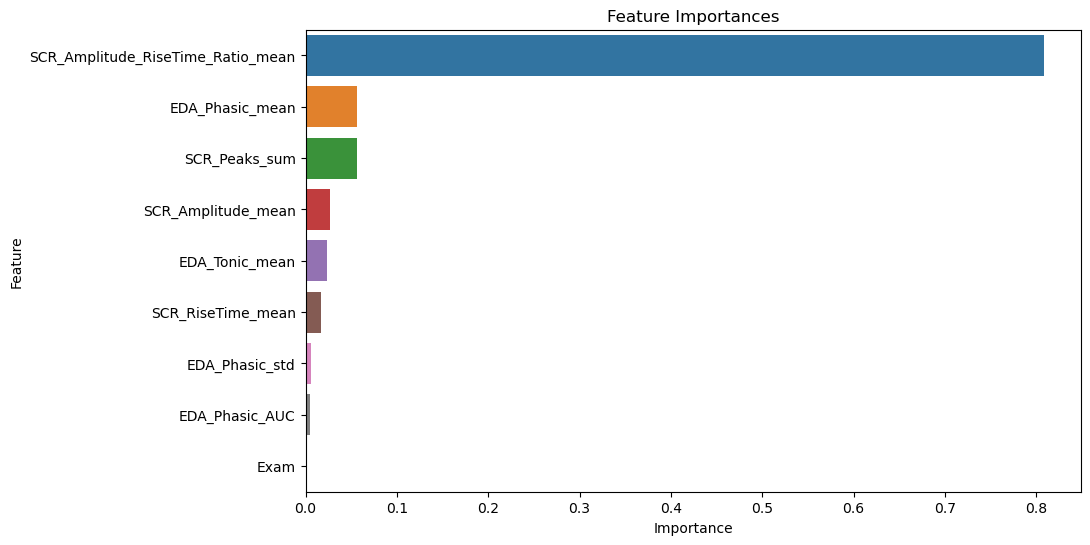

In [18]:
#plot the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
#get the pca columns
#pca_columns = ['PCA' + str(i) for i in range(1, len(feature_importances) + 1)]
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [19]:
#implement a random forest regressor with grid search

param_grid = {'n_estimators': [100, 200, 300],
                'max_features': [None, 'sqrt', 'log2'],
                'max_depth': [3, 4, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],}
rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1, verbose=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Mean Squared Error: 0.004179920839992938
RMSE: 0.06465230730602689
R^2: 0.6950063282625782
AIC: -91.54925940851054


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

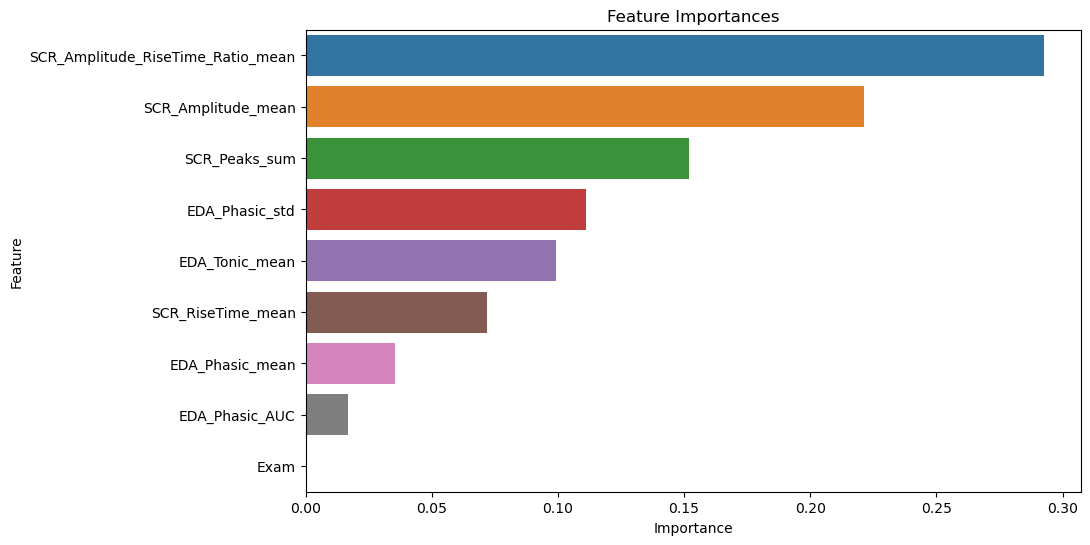

In [20]:
#plot the feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [21]:
#implement a support vector regressor with grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Mean Squared Error: 0.004775756725616439
RMSE: 0.06910685006290215
R^2: 0.6515303435571987
AIC: -88.88405682073281


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

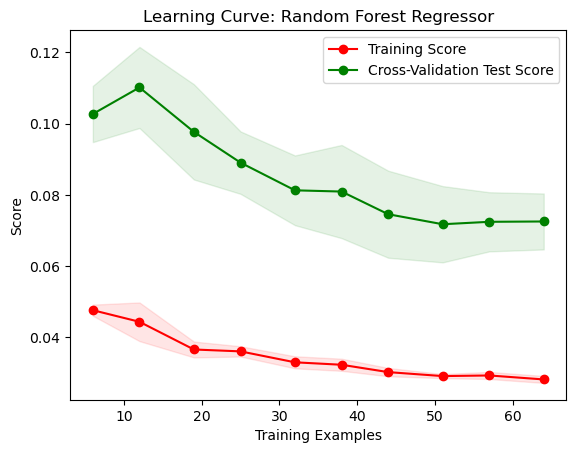

In [22]:
#implement a learning curve for the random forest regressor
train_sizes, train_scores, test_scores = learning_curve(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve: Random Forest Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()

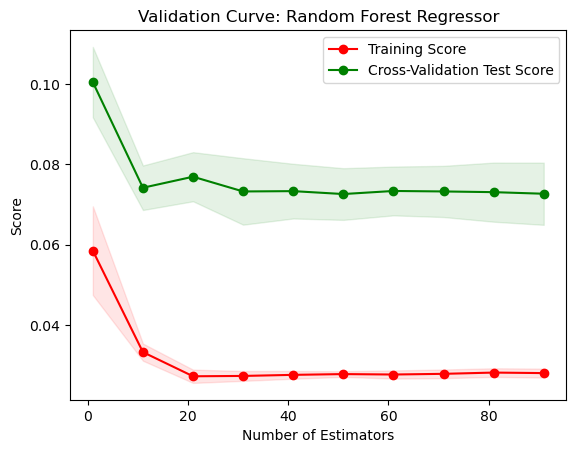

In [23]:
#implement a validation curve for the random forest regressor
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(rf_reg, X_train_scaled, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve: Random Forest Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()


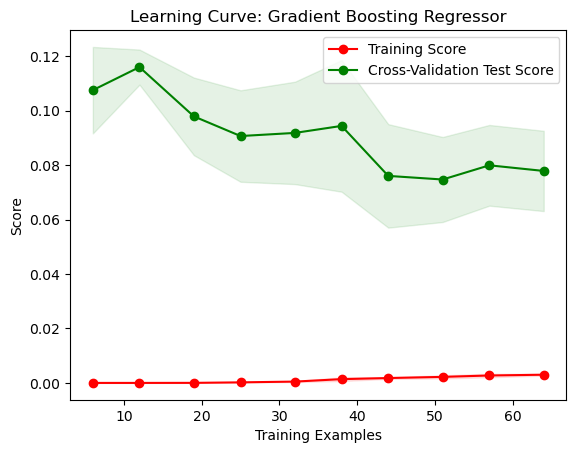

In [24]:
#implement a learning curve for the gradient boosting regressor
train_sizes, train_scores, test_scores = learning_curve(gb_reg, X_train_scaled, y_train, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve: Gradient Boosting Regressor')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Test Score')
plt.legend(loc='best')
plt.show()

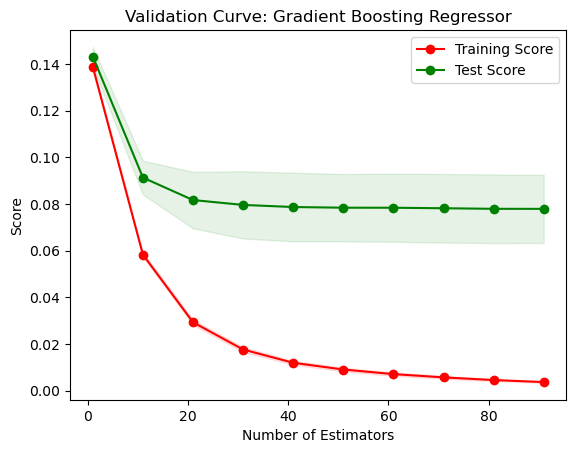

In [25]:
#implement a validation curve for the gradient boosting regressor
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(gb_reg, X_train_scaled, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
train_scores_mean = -1*np.mean(train_scores, axis=1)
train_scores_std = -1*np.std(train_scores, axis=1)
test_scores_mean = -1*np.mean(test_scores, axis=1)
test_scores_std = -1*np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve: Gradient Boosting Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(param_range, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

In [26]:
#implement a multi-layer perceptron regressor
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=42, max_iter=100000, hidden_layer_sizes=(128, 128))
mlp_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = mlp_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.012112424094979883
RMSE: 0.11005645866999303
R^2: 0.11620032058430718
AIC: -70.27047136906431


In [27]:
#implement a multi-layer perceptron regressor with grid search
param_grid = {'hidden_layer_sizes': [(64, 64), (128, 128), (256, 256)],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
mlp_reg = MLPRegressor(random_state=42, max_iter=100000)
grid_search = GridSearchCV(mlp_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

#predict the target
y_pred = grid_search.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

grid_search.best_params_

Mean Squared Error: 0.00270104913719272
RMSE: 0.05197161857391705
R^2: 0.8029142355966257
AIC: -100.28230024229457


{'alpha': 1, 'hidden_layer_sizes': (64, 64)}

In [28]:
# implement a voting regressor
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg), ('mlp', mlp_reg)])
voting_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = voting_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.00603650501606797
RMSE: 0.0776949484591371
R^2: 0.5595381109382338
AIC: -84.19860148471668


In [29]:
# implement a stacking regressor
from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor(estimators=[('rf', rf_reg), ('gb', gb_reg)], final_estimator=mlp_reg)
stacking_reg.fit(X_train_scaled, y_train)

#predict the target
y_pred = stacking_reg.predict(X_test_scaled)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Mean Squared Error: 0.006676647968573077
RMSE: 0.08171075797331143
R^2: 0.5128292001729053
AIC: -82.1827843697942






Epoch 1/500

3/3 [==============================] - 2s 188ms/step - loss: 0.6339 - val_loss: 0.3867
Epoch 2/500
3/3 [==============================] - 0s 52ms/step - loss: 0.3213 - val_loss: 0.2547
Epoch 3/500
3/3 [==============================] - 0s 32ms/step - loss: 0.3276 - val_loss: 0.2976
Epoch 4/500
3/3 [==============================] - 0s 31ms/step - loss: 0.3180 - val_loss: 0.2684
Epoch 5/500
3/3 [==============================] - 0s 57ms/step - loss: 0.2383 - val_loss: 0.2475
Epoch 6/500
3/3 [==============================] - 0s 40ms/step - loss: 0.2279 - val_loss: 0.2542
Epoch 7/500
3/3 [==============================] - 0s 74ms/step - loss: 0.2379 - val_loss: 0.2310
Epoch 8/500
3/3 [==============================] - 0s 53ms/step - loss: 0.2004 - val_loss: 0.2073
Epoch 9/500
3/3 [==============================] - 0s 60ms/step - loss: 0.1761 - val_loss: 0.1989
Epoch 10/500
3/3 [==============================] - 0s 60ms/step - loss: 0.1754 - val_loss: 0.1873
Epoch 11/500


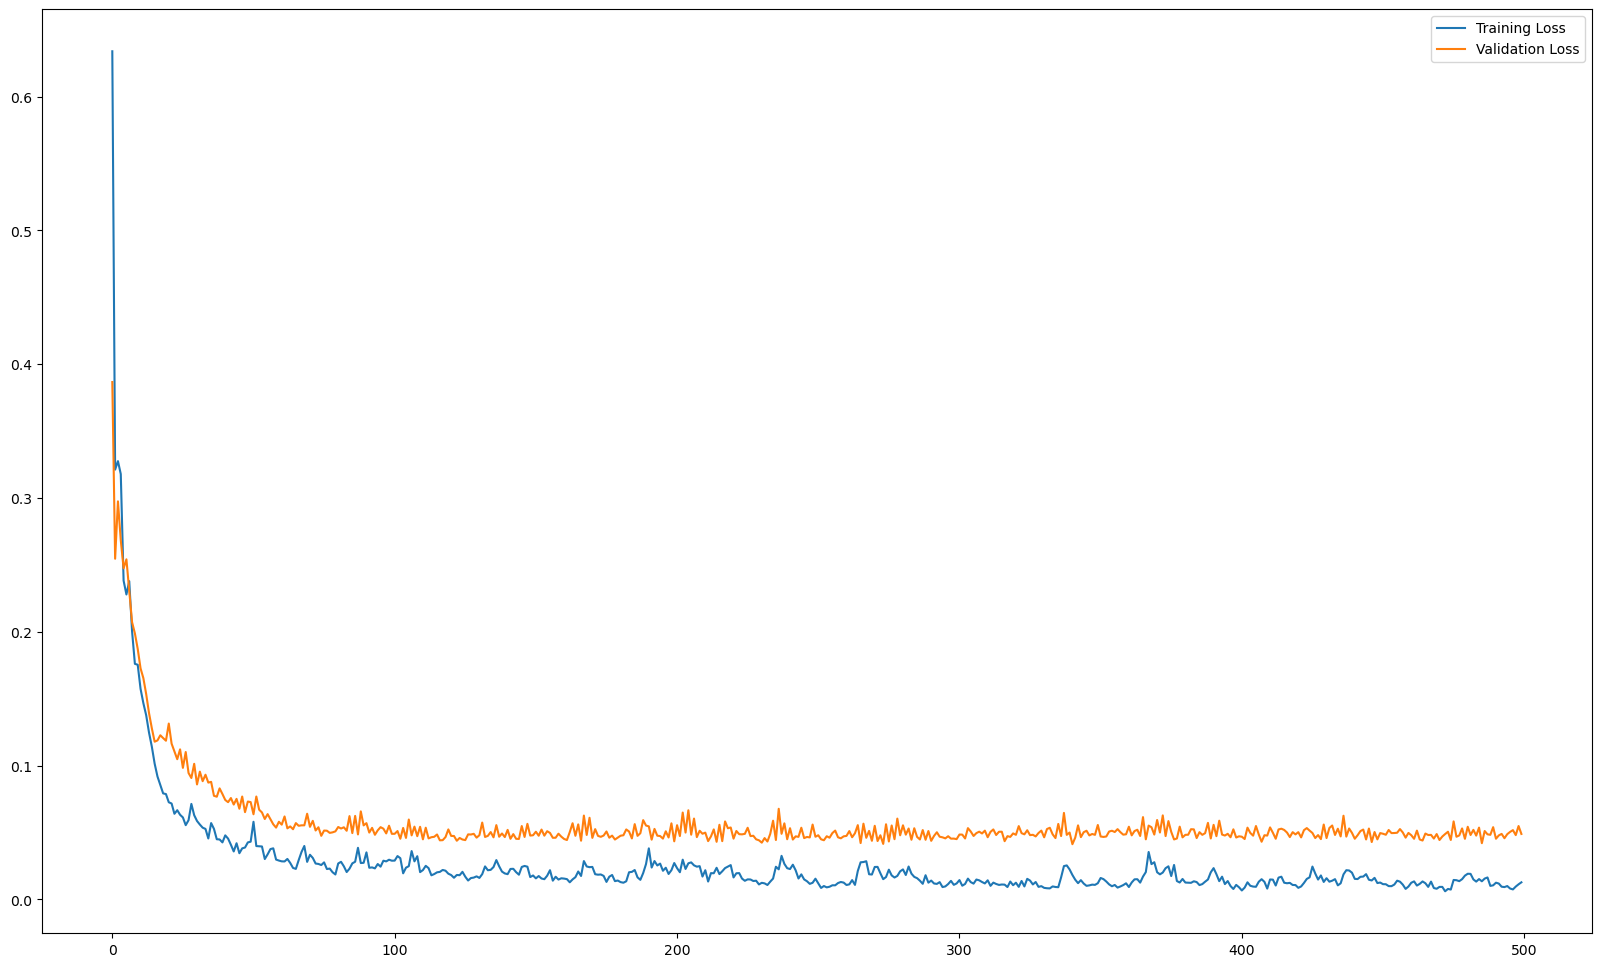

1/1 [==============================] - 0s 149ms/step
Mean Squared Error: 0.0027836037804605885
RMSE: 0.052759869033770244
R^2: 0.7968905225328915
AIC: -99.68017733750614


In [30]:
#implement a CNN regressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


#reshape the data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

#implement a CNN regressor
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Epoch 1/500
3/3 [==============================] - 2s 217ms/step - loss: 0.9082 - val_loss: 0.8352
Epoch 2/500
3/3 [==============================] - 0s 41ms/step - loss: 0.7244 - val_loss: 0.6932
Epoch 3/500
3/3 [==============================] - 0s 44ms/step - loss: 0.5417 - val_loss: 0.5719
Epoch 4/500
3/3 [==============================] - 0s 41ms/step - loss: 0.4236 - val_loss: 0.4367
Epoch 5/500
3/3 [==============================] - 0s 42ms/step - loss: 0.3745 - val_loss: 0.3231
Epoch 6/500
3/3 [==============================] - 0s 41ms/step - loss: 0.3092 - val_loss: 0.2832
Epoch 7/500
3/3 [==============================] - 0s 24ms/step - loss: 0.2632 - val_loss: 0.2926
Epoch 8/500
3/3 [==============================] - 0s 43ms/step - loss: 0.2216 - val_loss: 0.2709
Epoch 9/500
3/3 [==============================] - 0s 46ms/step - loss: 0.2018 - val_loss: 0.2287
Epoch 10/500
3/3 [==============================] - 0s 44ms/step - loss: 0.1893 - val_loss: 0.2034
Epoch 11/500
3/3 [

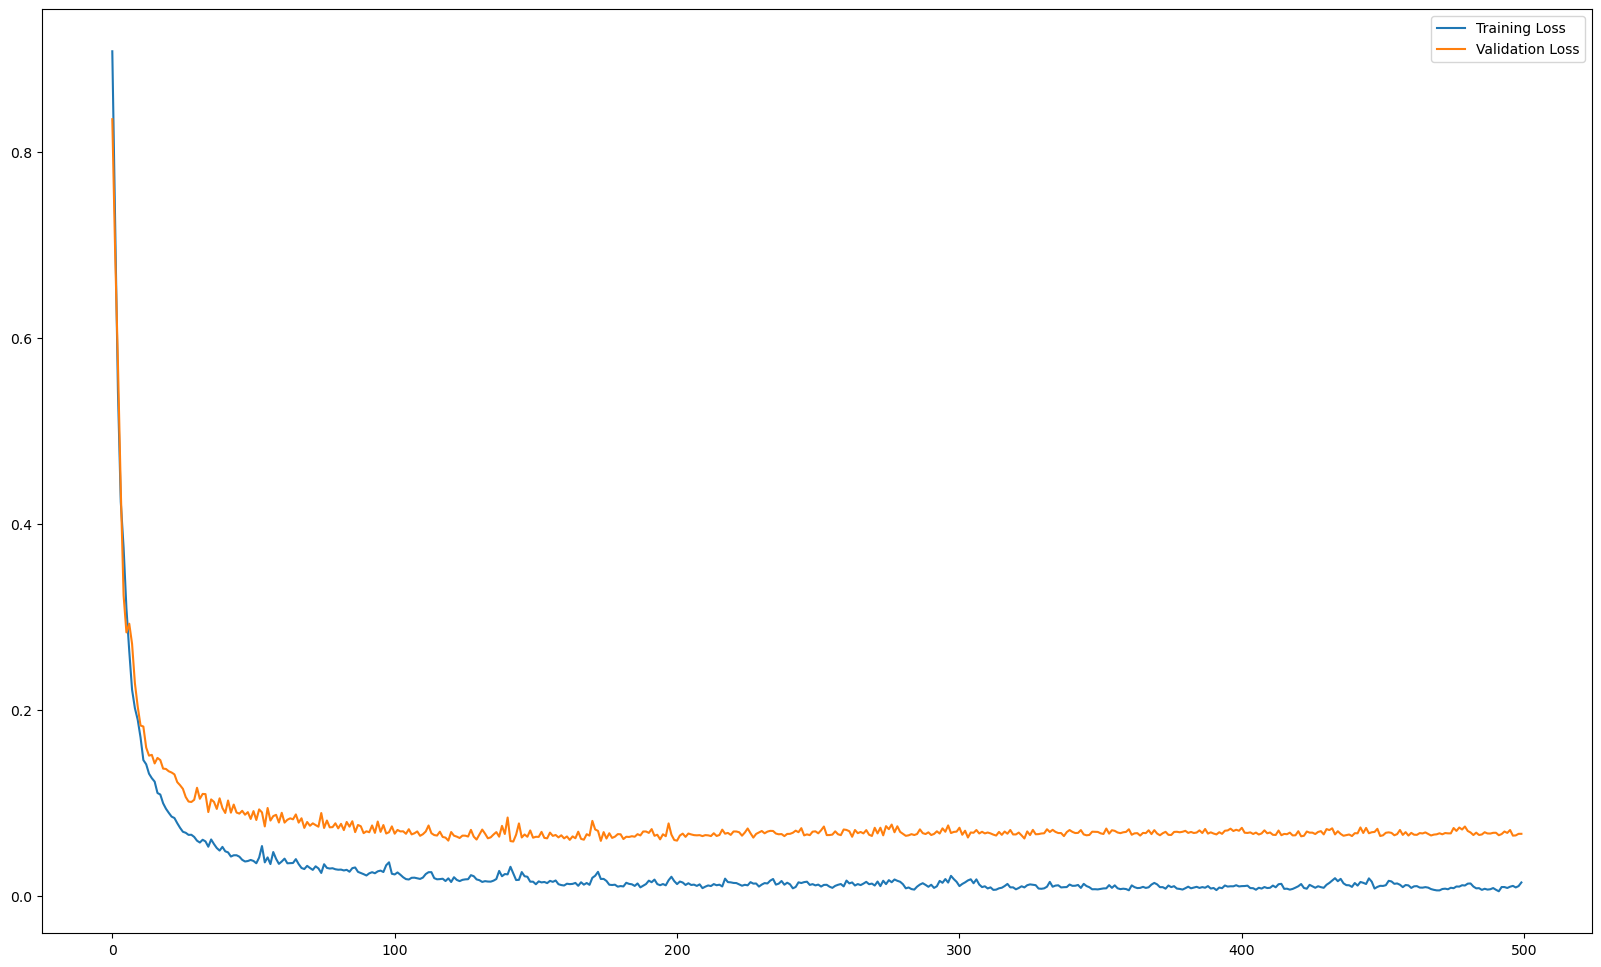

1/1 [==============================] - 0s 180ms/step
Mean Squared Error: 0.0092502332792491
RMSE: 0.09617813306177814
R^2: 0.32504400914189546
AIC: -75.66213016795051


In [31]:
#implement a RNN regressor
model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model_rnn.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model_rnn.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)

Epoch 1/500
3/3 [==============================] - 2s 227ms/step - loss: 0.7712 - val_loss: 0.8490
Epoch 2/500
3/3 [==============================] - 0s 56ms/step - loss: 0.7166 - val_loss: 0.8006
Epoch 3/500
3/3 [==============================] - 0s 49ms/step - loss: 0.6598 - val_loss: 0.7479
Epoch 4/500
3/3 [==============================] - 0s 48ms/step - loss: 0.5998 - val_loss: 0.6886
Epoch 5/500
3/3 [==============================] - 0s 40ms/step - loss: 0.5380 - val_loss: 0.6278
Epoch 6/500
3/3 [==============================] - 0s 42ms/step - loss: 0.4863 - val_loss: 0.5567
Epoch 7/500
3/3 [==============================] - 0s 40ms/step - loss: 0.4433 - val_loss: 0.4659
Epoch 8/500
3/3 [==============================] - 0s 42ms/step - loss: 0.3916 - val_loss: 0.3561
Epoch 9/500
3/3 [==============================] - 0s 58ms/step - loss: 0.3289 - val_loss: 0.2702
Epoch 10/500
3/3 [==============================] - 0s 51ms/step - loss: 0.2748 - val_loss: 0.2280
Epoch 11/500
3/3 [

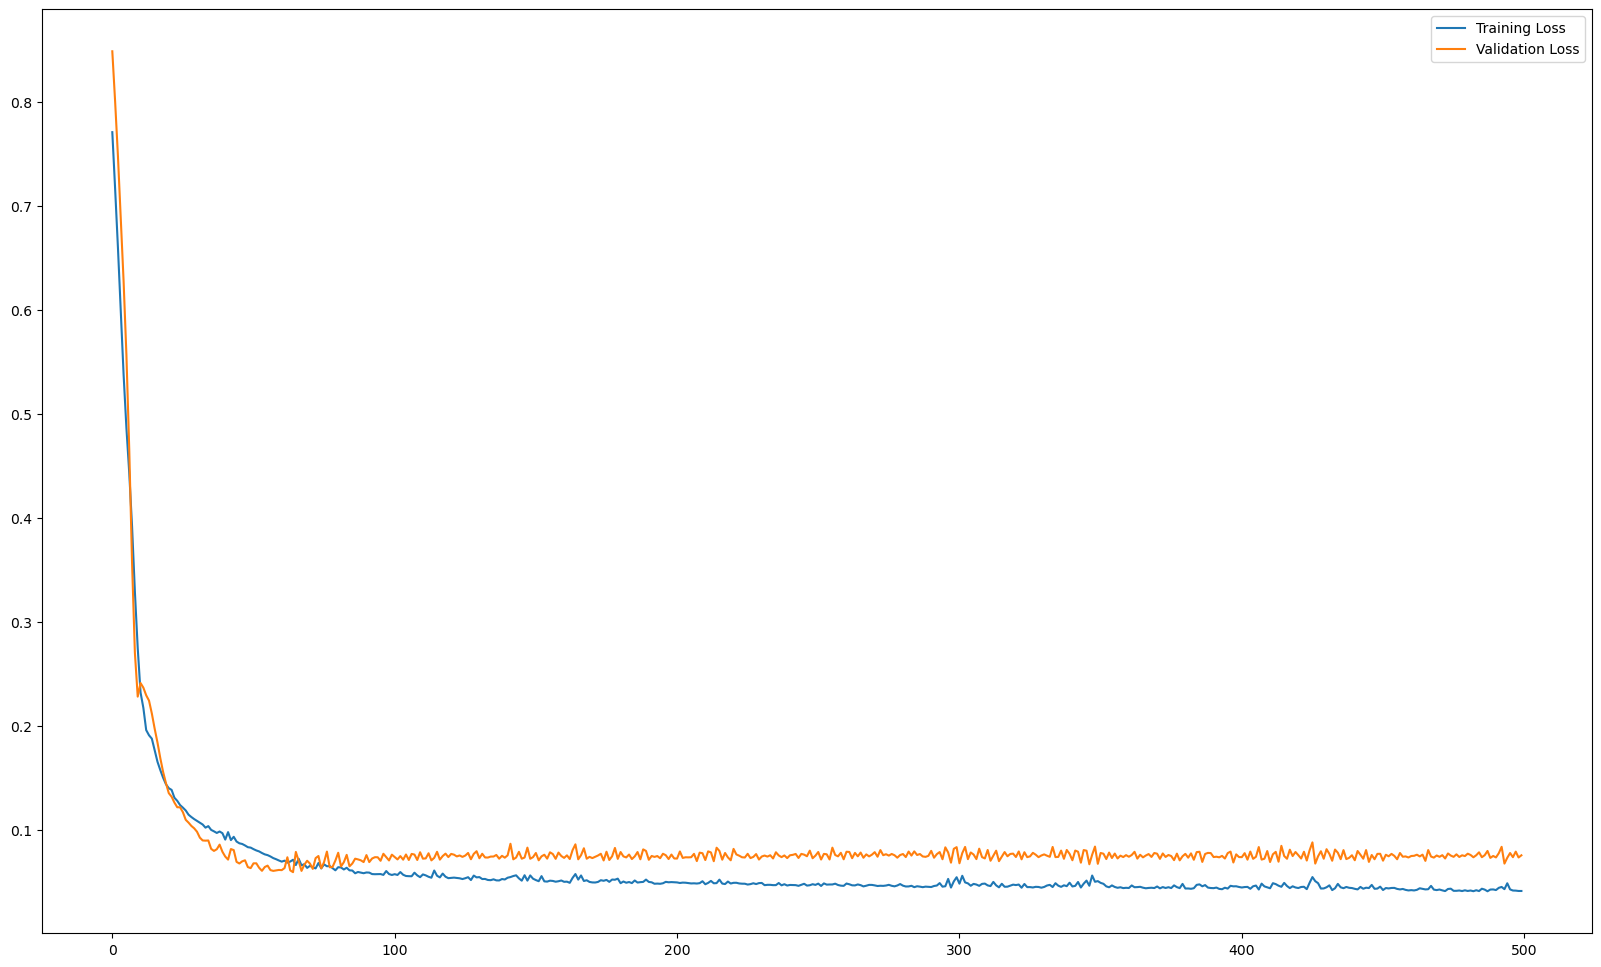

1/1 [==============================] - 0s 222ms/step
Mean Squared Error: 0.007095944158165138
RMSE: 0.08423742730025138
R^2: 0.4822346771413618
AIC: -80.96463806972994


In [32]:
#implement a LSTM regressor
model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#implement model checkpoint
model_checkpoint = ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min', save_best_only=True)

#fit the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=32, callbacks=[model_checkpoint])

#plot the learning curves
plt.figure(figsize=(20, 12))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

#plot the learning curves with plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Training Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Learning Curves', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

#load the best model
model = load_model('best_model_lstm.h5')

#predict the target
y_pred = model.predict(X_test_reshaped)

#calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#calculate rmse score
rmse = np.sqrt(mse)
print('RMSE:', rmse)

#calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

#compute the Akaike Information Criterion (AIC)
n = len(y_test)
k = len(X_test.columns)
aic = n * np.log(mse) + 2 * k
print('AIC:', aic)